In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

print(medical.shape)

medical.head()

(1338, 8)


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [25]:
print(medical['charges'].describe())

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


Above, we calculated the mean and standard deviation, as well as several other summary statistics that we can use to begin to understand our data. In this mini-project I will be focusing on the medical charges. Focusing on the charges I will simulate a real-world business problem and how it would be dealt with as if you had recently been hired by hospital administration as a consultant to assist in developing business strategy and insight regarding some important questions needing to be answered. Below I will plot "charges", in a multitude of different looks, beginning with simple histograms and kernel densities, then I will plot the charge data using a swarm plot which will depict a better understanding of distribution characteristics opposed to histograms as well as visualize charges with a couple boxplots which would be give more insight than all of the above.

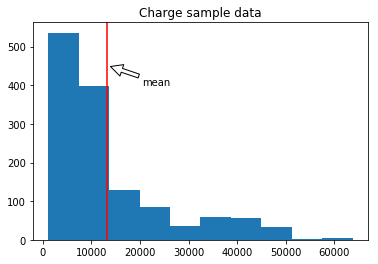

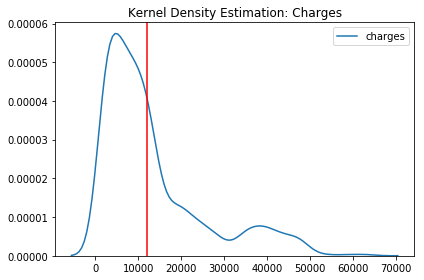

In [26]:
plt.hist(medical['charges'])
plt.title('Charge sample data')
plt.axvline(13270, c='red')
plt.annotate('mean'.format(avg_charge), xy=(13570, 450), xytext=(20500, 400),
            arrowprops=dict(facecolor='white', shrink=0.05))
plt.show()

#kde
sns.kdeplot(medical['charges'])
plt.title('Kernel Density Estimation: Charges')
plt.axvline(12000, c='red')
plt.tight_layout()

We see we have an exponential distribution. Exponential distributions are always skewed, right-skewed to be exact. This tells us we have some extremely large and peculiar charges relative to the average charge (shown by solid vertical line) which is disrupting what we'd expect to be a normal standard distribution. Because this is a skewed set, the median would be a better value opposed to the mean if looking for centrality. Looking at the standard deviation also indicates the presence of these outliers. These can be seen clearly in the boxplot.

Average charge: 13270.42
Charge standard deviation: 12110.01
median: 9382.033


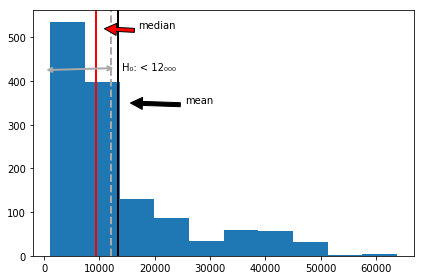

In [42]:
mean_charge = round(np.mean(medical['charges']), 2)
print('Average charge: {}'.format(mean_charge))

charge_std = round(np.std(medical['charges'], ddof=1), 2)
print('Charge standard deviation: {}'.format(charge_std))

plt.hist(medical['charges'])#, bins=50)

# median
median_val = np.percentile(medical.charges, 50)
print('median: {}'.format(median_val))
plt.axvline(median_val, c='red', lw=2)
plt.annotate('median'.format(avg_charge), xy=(10570, 520), xytext=(17000, 520),arrowprops=dict(facecolor='red', shrink=0.05))

#mean
plt.axvline(13270, c='black', lw=2)
plt.annotate('mean'.format(avg_charge), xy=(15070, 350), xytext=(25500, 350), arrowprops=dict(facecolor='black', shrink=0.05))

# hypothesis
plt.axvline(12000, c='darkgrey', ls='--', lw=2)
SUB = str.maketrans("0", "₀")
string = "H0: < 12000"
plt.annotate(string.translate(SUB), xy=(-1, 425), xytext=(14000, 425),
             arrowprops=dict(arrowstyle='<->',color='darkgrey',linewidth=2, shrinkA=6, shrinkB=2))

plt.tight_layout()

Sample statistics like the sample mean computed from only a sample (such as the data we have here to work with, just a sample of the data provided by the hospital the analysis is being done for) will be expected to vary from one draw to another. If we were to perform additional random sampling of n (size) observations and calculate the mean of each, we get the sampling distribution of the mean. The Central Limit Theorem (CLT) tells us that the distribution of these means across samples will approach a normal distribution as the number of observations (𝑛) increases. For the sampling distribution of the mean, we get the standard deviation for the sampling distribution of the mean (𝜎𝑚𝑒𝑎𝑛) in this way:
- 𝜎𝑚𝑒𝑎𝑛 = 𝜎/√𝑛
    - 𝜎: population standard deviation

Since all we have is a sample of the population data, we can calculate the mean and std of this sample using these as estimates of our population mean and std. We sample many times and look at how they vary across the samples. Below I will do (compute many samples) for both mean and std of the sample 

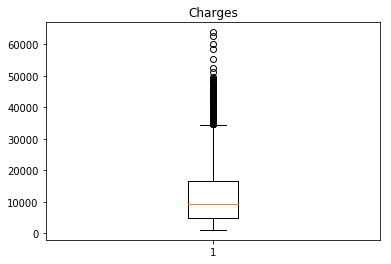

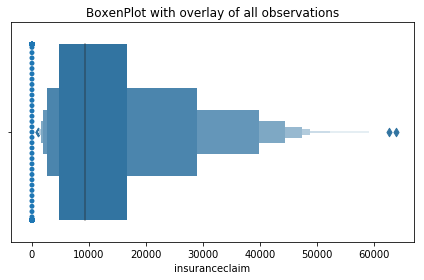

In [39]:
# standard box-plot
plt.boxplot(medical['charges'])
plt.title('Charges')
plt.show()

#boxenplot for large numbers
ax = sns.boxenplot(x=medical['charges'])
ax = sns.swarmplot(x=medical['insuranceclaim'], hue=medical['smoker'])
plt.title('BoxenPlot with overlay of all observations')
plt.tight_layout()

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Based on the CLT, as n increases we can expect distribtuion to approach normal distribution. This allows us to estimate the population mean from the sampling distribution of the sample means. Bootstrap sampling is a good candidate considering the data is non-normal in its distribution. The most appropriate test would be the single sample t-test.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ Typically a confidence level of 95% is common confidence level to estimate a confidence interval from. In this case, given the H_o_ (null hypothesis) of average charge less than 12000, this would call for a single tail test since the concern is a fear that the average charge has falling below (to the left tail) 12000. We choose one-tail interval test because this will test for whether the mean is less than or if mean is greater than null, but not both. In this specific case we are concerned with less than null (12000).

In [58]:
np.random.seed(77)
for _ in range(50):
    # Generate bootstrap sample
    bs_sample = np.random.choice(medical.charges, size=len(medical.charges))

bs_sample_mean = np.mean(bs_sample)
print('Mean charge from bootstrap sample: {}'.format(round(bs_sample_mean),3))
bs_sample_median = np.median(bs_sample)
print('Median charge from bootstrap sample: {}\n'.format(round(bs_sample_median),3))

sample_mean = np.mean(medical.charges)
print('Mean charge of entire sample data: {}'.format(round(sample_mean),3))
sample_median = np.median(medical.charges)
print('Median charge of entire sample data: {}'.format(round(sample_median),3))

Mean charge from bootstrap sample: 14021.0
Median charge from bootstrap sample: 9415.0

Mean charge of entire sample data: 13270
Median charge of entire sample data: 9382.0


The numbers show (above), as sample size (n) increases, distribution gradually becomes more normally distributed which means, the more samples taken the better are our ability to replicate an estimated parameter from sample for the population our sample derived from.
***********
Next, 
I will calculate the critical value for confidence interval at 95 percent confidence level but to begin with:

- Build out the sampling distribution of the mean from many samples to estimate our population parameter which will be needed to answer the following question since we dont know anything about the population, I'll begin with plotting a cdf of an individual bootstrap sample and calculate a boostrap replicate for the sample mean then compare it to an ecdf of the original data (for charges). 

    - ECDF: An empirical cumulative density function (ecdf) is a distribution of the probabilities you would get if you sampled from your sample, instead of the population. Since all we have is a sample, this makes sense to do here,  especially to show the difference of means from a single bootstrap sample and the sampling distribution of means.

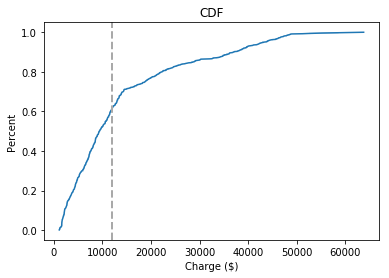

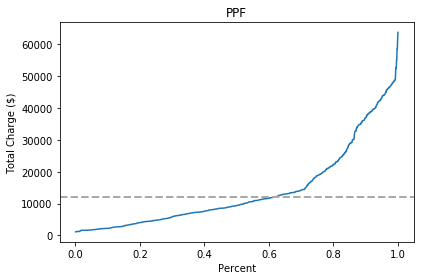

In [69]:
np.random.seed(77)
x = np.sort(bs_sample)# medical.charges
n = x.size
norm_cdf = np.arange(1, n+1) / n

chart = sns.lineplot(x=x, y=norm_cdf)
chart.axvline(12000, c='darkgrey', lw=2, ls='--')
chart.set_title('CDF')
chart.set_xlabel('Charge ($)')
chart.set_ylabel('Percent')
plt.show()

# Plot PPf
x = np.sort(bs_sample)
norm_ppf = np.arange(1, n+1) / n
chart1 = sns.lineplot(norm_ppf, x)
chart1.axhline(12000, c='darkgrey', lw=2, ls='--')

chart1.set_title('PPF')
chart1.set_xlabel('Percent')
chart1.set_ylabel('Total Charge ($)')
plt.tight_layout()

Given the nature of the administrator's concern, we'd need to determine an appropriate confidence interval. Below I calculate the critical value and the relevant 95% confidence interval for the mean. With this infromation we can begin to suggest whether there should be reason for concern regarding the likelihood for the mean charge falling below 12000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

In [76]:
charges_without_claim = medical.loc[medical.insuranceclaim == 0, 'charges']
print('Average charge for people without claims: {}'.format(round(np.mean(charges_without_claim),2)))

charges_with_claim = medical.loc[medical.insuranceclaim == 1, 'charges']
print('Average charge for people with claims: {}'.format(round(np.mean(charges_with_claim),2)))

Average charge for people without claims: 8821.42
Average charge for people with claims: 16423.93


In [77]:
# t manually
# means of both groups
a = charges_without_claim
b = charges_with_claim

mean_a = np.mean(a)
mean_b = np.mean(b)


# sum the two groups
sum_a = np.sum(a)
sum_b = np.sum(b)
# square the sums
sum_squared_a = np.sqrt(sum_a)
sum_squared_b = np.sqrt(sum_b)

#square individual scores
sum_individual_scores_a = [np.sum(np.sqrt(charge)) for charge in a]
sum_individ_scores_b = [np.sum(np.sqrt(charge)) for charge in b]

left = sum_squared_a - sum_squared_a/len(a)

right = sum_squared_b - sum_squared_b/len(b)

sum_squared_mimus_len_ab = left + right

denom1 = (len(a)+len(b)) - 2
denom2 = (1/len(a)) + (1/len(b))

denom3 = (sum_squared_mimus_len_ab / denom1) * denom2

mean_diff_ab = mean_a - mean_b
t = mean_diff_ab / np.sqrt(denom3)

print('t: {}'.format(t))
dof = (len(a) - 1) + (len(b) - 1)
print('dof: {}'.format(dof))

t: -65813.27822149995
dof: 1336


As we can see, a bootstrap replicate of the mean computed from a single sample is not very telling for estimating the mean of the population, let alone the individual sample data itself. Therefore, as opposed to a single sample, below I will sample many times from our sample data in effort to build out a sampling distribution of means. This allows for a more accurate estimate of what an average charge would look like for an entire population.

Sampling distribution mean charge: 13270.56
Standard Deviation of sampling distribution of means: 330.73


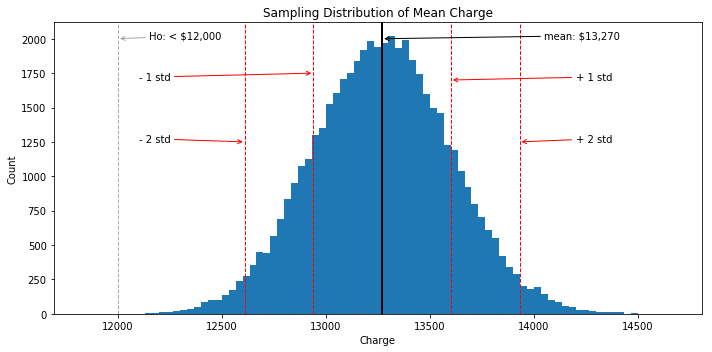

In [78]:
# estimating the mean charge from sampling distribution of means manually
np.random.seed(1)

# function for building sammpling distribution
def population_sampler(n):
    return np.random.choice(medical.charges, n)  

# Establish sampling distribution of mean from 50,000 bootstrap samples 
n = len(medical.charges)
sampling_dist  = [np.mean(population_sampler(n)) for _ in range(50000)]

sampling_dist_mean = round(np.mean(sampling_dist),2)
print('Sampling distribution mean charge: {}'.format(sampling_dist_mean))

sampling_dist_std = round(np.std(sampling_dist, ddof=1), 2)
string = 'Standard Deviation of sampling distribution of means: {}'
print(string.format(sampling_dist_std)) 

# plot sampling distribution of mean
fig, ax = plt.subplots(1, figsize=(10,5))
plt.hist(sampling_dist, bins=85)
plt.tight_layout()

#mean indicator and annotation
plt.axvline(13270.56, c='black', lw=2)
plt.annotate('mean: $13,270'.format(sampling_dist_mean), xy=(13270, 2000), xytext=(14050, 2000),
             arrowprops=dict(arrowstyle='->', color='black'))#, linewidth=1, shrinkA=6, shrinkB=2))

# hypothesis indicator and annotation
plt.axvline(12000, c='darkgrey', ls='--', lw=1)
hypothesis = 12000
plt.annotate("Ho: < $12,000".format(hypothesis), xy=(12000, 2000), xytext=(12150, 2000), 
             arrowprops=dict(arrowstyle='->', color='darkgrey'))#, linewidth=1, shrinkA=4, shrinkB=1))

plus_one_std = sampling_dist_mean + sampling_dist_std
minus_one_std = sampling_dist_mean - sampling_dist_std
plt.axvline(plus_one_std, c='red', ls='--', lw=1)
plt.annotate("+ 1 std".format(plus_one_std), xy=(13600, 1700), xytext=(14200, 1700), 
             arrowprops=dict(arrowstyle='->', color='red'))#, linewidth=1, shrinkA=6, shrinkB=2))

plt.axvline(minus_one_std, c='red', ls='--', lw=1)
plt.annotate("- 1 std".format(minus_one_std), xy=(12940, 1750), xytext=(12100, 1700), 
             arrowprops=dict(arrowstyle='->', color='red'))#, linewidth=1, shrinkA=6, shrinkB=2))

plus_two_std = plus_one_std + sampling_dist_std
minus_two_std = minus_one_std - sampling_dist_std
plt.axvline(plus_two_std, c='red', ls='--', lw=1)
plt.annotate("+ 2 std".format(plus_two_std), xy=(13930, 1250), xytext=(14200, 1250), 
             arrowprops=dict(arrowstyle='->', color='red'))#, linewidth=1, shrinkA=6, shrinkB=2))

plt.axvline(minus_two_std, c='red', ls='--', lw=1)
plt.annotate("- 2 std".format(minus_two_std), xy=(12610, 1250), xytext=(12100, 1250), 
             arrowprops=dict(arrowstyle='->', color='red'))#, linewidth=1, shrinkA=2, shrinkB=2))

plt.title('Sampling Distribution of Mean Charge')
plt.xlabel('Charge')
plt.ylabel('Count')
plt.tight_layout()

Above, we see the sampling distribution of means with a mean charge of 13270.56. This is light-years away from the assumption of a mean charge of 12000 that was a concern to the hospital administration. 
*****
__Question continued:__ Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__Answer continued:__

Below I will calculate the critical value and the confidence interval at 95% confidence level.

In [79]:
from scipy.stats import norm

# Critical value at 95% confidence level
a = 0.05
critical_val = round(norm.ppf(a),2)
print('Critical Value for 95% confidence level: {}'.format(critical_val))
print('-------------------------------------------------')
# check alpha
print('Confirm alpha: {}'.format(round(norm.cdf(-1.64),2) == a))
# check confidence level
print('Confirm confidence level at critical val -1.64: {}'.format(1 - round(norm.cdf(-1.64),2)))

Critical Value for 95% confidence level: -1.64
-------------------------------------------------
Confirm alpha: True
Confirm confidence level at critical val -1.64: 0.95


In [75]:
from scipy.stats import norm
sample = np.random.choice(medical.charges, size=len(medical.charges))
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

#The 95% confidence interval for population mean
conf_level = .95
alpha = 1-conf_level
low_p = alpha / 2
upp_p = conf_level + low_p  #  .975 = .95 + .025
upper_v = norm.ppf(upp_p)
lower_v = norm.ppf(low_p)

1338

In [83]:
# 95% Confidence interval (another method)
# Lower percentile (2.5)
lower_p = alpha / 2.0

# Minimum charge at lower percentile (2.5) 
min_charge = round(min(sampling_dist),2)
lower = max(min_charge, np.percentile(sampling_dist, lower_p))
print('Minimum charge (at %.1fth percentile): %.2f' % (lower_p, lower))

# upper percentile (97.5)
upper_p = (100 - alpha) + (alpha / 2.0)

# Maximum charge at upper percentile (97.5) 
max_charge = round(max(sampling_dist),2)
upper = min(max_charge, np.percentile(sampling_dist, upper_p))
print('Maximum charge (at %.1fth percentile): %.2f' % (upper_p, upper))
print('Confidence Interval (range) at 95% confidence: {} - {}'.format(round(lower,2), round(upper,2)))

Minimum charge (at 2.5th percentile): 12628.94
Maximum charge (at 97.5th percentile): 13919.45
Confidence Interval (range) at 95% confidence: 12628.94 - 13919.45


- Plot critical value and z-scores for sampling distribution of means

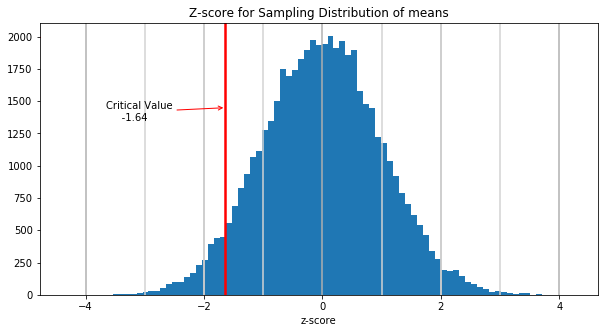

In [80]:
from scipy.stats import zscore
fig, ax = plt.subplots(figsize=(10,5))

# Plot critical value vs null on z-score sampling distribution
sampling_dist = round(pd.Series(np.sort(sampling_dist)), 2)
zscores = round(pd.Series(zscore(sampling_dist)), 2)
zscore_df = pd.concat([sampling_dist, zscores], axis=1)
zscore_df.rename(columns={0:'charge', 1:'z_score'}, inplace=True)

ax.hist(zscore_df.z_score, bins=85)
ax.grid(axis='x', lw=1.5)

plt.axvline(-1, c='lightgrey', ls='-', lw=1.5)
plt.axvline(-2, c='lightgrey', ls='-', lw=1.5)
plt.axvline(+1, c='lightgrey', ls='-', lw=1.5)
plt.axvline(+2, c='lightgrey', ls='-', lw=1.5)
plt.axvline(-3, c='lightgrey', ls='-', lw=1.5)
plt.axvline(+3, c='lightgrey', ls='-', lw=1.5)

# critical value
plt.axvline(critical_val, c='red', ls='-', lw=2.5)
plt.annotate("Critical Value\n     -1.64".format(critical_val), xy=(-1.64, 1450), xytext=(-3.65, 1350), 
             arrowprops=dict(arrowstyle='->', color='red'))

# Rejection Region
plt.axhline(2000, c='red', ls='-', lw=1, xmax=-1.64)


plt.title('Z-score for Sampling Distribution of means')
plt.xlabel('z-score')
plt.show()

**Hypothesis Test**

In our case considering a null hypothesis (Ho): <12000, this calls for a one-tail (left) hypothesis test where if null falls in rejection region which is everything to the left of critical value -1.64 (shown above) or all values < observed value of 12370 at crit -1.64 (shown below), then we reject null. We would accept null hypothesis if it fell anywhere to the right of our critical value or > observation. Below, I will plot observed value at critical level (-1.64) vs null hypothesis

Observation at 95% confidence level: 12730.46
null hypothesis (Ho): 12000
Reject null hypothesis


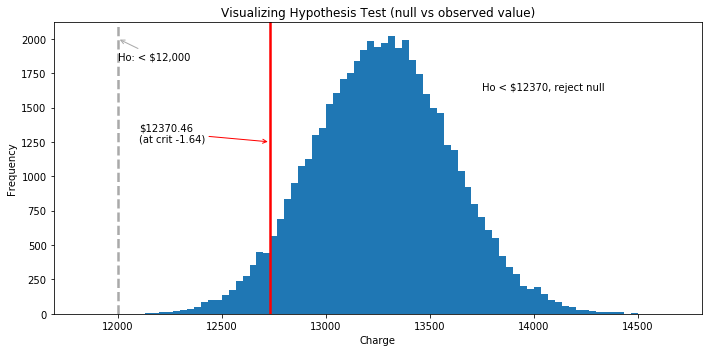

In [81]:

alpha = 5
conf_level = 100 - alpha
min_observation = round(min(sampling_dist),2)
observation = max(min_observation, np.percentile(sampling_dist, alpha))
print('Observation at {}% confidence level: {}'.format(conf_level, round(observation,2)))

# Plot null hypothesis vs critical value
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(sampling_dist, bins=85)
plt.axvline(observation, label='observation: 12370.46', c='red', ls='-', lw=2.5)
plt.annotate("$12370.46\n(at crit -1.64)".format(critical_val), xy=(12730, 1250), xytext=(12100, 1250), 
             arrowprops=dict(arrowstyle='->', color='red'))#, linewidth=1, shrinkA=2, shrinkB=2))

# hypothesis indicator and annotation
null = 12000
print('null hypothesis (Ho): {}'.format(null))
plt.axvline(null, label='null hypothesis: < 12000', c='darkgrey', ls='--', lw=2.5)
plt.annotate("Ho: < $12,000".format(null), xy=(12000, 2000), xytext=(12000, 1850),
             arrowprops=dict(arrowstyle='->', color='darkgrey'))
plt.title('Visualizing Hypothesis Test (null vs observed value)')
plt.xlabel('Charge')
plt.ylabel('Frequency')
    
# Run hypothesis test
def left_tail_hypothesis_test(null, observation):
    if null < observation:
        print('Reject null hypothesis')
    else:
        print('Accept null hypothesis')
left_tail_hypothesis_test(null=null, observation=observation)
        
#outcome = str(left_tail_hypothesis_test(null, observation))
ax.annotate('Ho < $12370, reject null', xy=(13750,1625))
plt.tight_layout()

- 95% confidence interval (100 - alpha)

In [82]:
# Lower percentile (2.5)
lower_p = alpha / 2.0

# Minimum charge at lower percentile (2.5) 
min_charge = round(min(sampling_dist),2)
lower = max(min_charge, np.percentile(sampling_dist, lower_p))
print('Minimum charge (at %.1fth percentile): %.2f' % (lower_p, lower))

# upper percentile (97.5)
upper_p = (100 - alpha) + (alpha / 2.0)

# Maximum charge at upper percentile (97.5) 
max_charge = round(max(sampling_dist),2)
upper = min(max_charge, np.percentile(sampling_dist, upper_p))
print('Maximum charge (at %.1fth percentile): %.2f' % (upper_p, upper))
print('Confidence Interval (range) at 95% confidence: {} - {}'.format(round(lower,2), round(upper,2)))

Minimum charge (at 2.5th percentile): 12628.94
Maximum charge (at 97.5th percentile): 13919.45
Confidence Interval (range) at 95% confidence: 12628.94 - 13919.45


CLT facts: The sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that even if the underlying population distribution is not normal (which is the case here), the sampling distribution will tend to become normal with sufficiently large sample size. This is the key driver for us 'requiring' a certain sample size. It is common to see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but **_if the underlying distribution is heavily skewed then you'd want to increase your sample size._**

*************

Use the t distribution for inference on a single mean or for comparing two means when the population standard deviations are unknown (which is the case in medical charges example here, as it is with real data, in the real world). With the t-distribution , we calculate the t-statistic in the same way as the z-statistic like so:

**T-STATISTIC CALCULATION**
- t-statistic = sample mean - null value / standard error of the sample mean.
    - standard error: Is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean

In [85]:
sample_mean = np.mean(medical.charges)
mean_hypothesis = 12000
t_statistic = (sample_mean - null) / np.std(sampling_dist, ddof=1)
print('t-statistic: {}'.format(t_statistic))

t-statistic: 3.841305507035002


In [88]:
from scipy.stats import t
dof = len(medical.charges) - 1
print('alpha for t at 3.84: {}'.format(t.pdf(3.84, dof)))
print('Confidence level for t = 3.84: {}'.format(t.cdf(3.84, dof)))
print('t for 99.9% confidence level: {}'.format(round(t.ppf(0.9999356046682549, dof),2)))
#print('t-score at 95% confidence level: {}\n'.format(round(t.ppf(t_statistic, dof), 2)))
#print('A t-score of -1.25 equals observation of {}'.format(12000 + (mean_of_samples_std * (round(t.ppf(t_statistic, dof), 2)))))

#sns.distplot(medical.charges)
#plt.axvline(181.53291933388113, ls='-', color='r')
#plt.tight_layout()

alpha for t at 3.84: 0.0002594233123130651
Confidence level for t = 3.84: 0.9999356046682549
t for 99.9% confidence level: 3.84


  > "When you perform a t-test, you're usually trying to find evidence of a significant difference between population means (2-sample t) or between the population mean and a hypothesized value (1-sample t). The t-value measures the size of the difference relative to the variation in your sample data. Put another way, T is the difference (represented in units) between the standard errors. The greater the magnitude of T, the greater the evidence against the null hypothesis. This means there is greater evidence that there is a significant difference. The closer T is to 0, the more likely there isn't a significant difference.
... Remember, the t-value in your output is calculated from only one sample from the entire population. How different could you expect the t-values from many random samples from the same population to be? And how does the t-value from your sample data compare to those expected t-values? You can use a t-distribution to find out." - [blog.minitab.com](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

In [1]:
charges_without_claim = medical.loc[medical.insuranceclaim == 0, 'charges']
print('Average charge for people without claims: {}'.format(round(np.mean(charges_without_claim),2)))

charges_with_claim = medical.loc[medical.insuranceclaim == 1, 'charges']
print('Average charge for people with claims: {}\n'.format(round(np.mean(charges_with_claim),2)))
Print('These averages are only from our sample data...\nThe question is then:\nWould these be representative of the entire population?')

NameError: name 'medical' is not defined

__Q:__ State the null and alternative hypothesis here.
        
        It is said generally that the null hypothesis is, no difference between groups. Therefore in this case:
          - Ho = No difference between mean charges of groups (with and w/o claims)
          - Ha != Significant statistical diffference between groups (with and w/o claims)

__Q:__ What assumption about the variances of the two groups are we making here?
       
        We are assuming groups have equal variance.

Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

*********************

Calculate T- with scipy.stats


In [95]:
# check manual work with scipy function
t_stat, p_val = ss.ttest_ind(charges_with_claim, charges_without_claim)
print('Independant T-Test from Scipy:\n   - T-Statistic: {}\n'.format(t_stat))
print('   - P-Val: {}'.format(str(p_val)))

# Or, same Independant t-test from statsmodels
from statsmodels.stats.weightstats import ttest_ind

t_stat, p_val, d_f = ttest_ind(charges_with_claim, charges_without_claim)
print('Independant t-test from statsmodels:\n   - t-statistic {}\n   - p-value {}\n   - dof {}'.format(t_stat, p_val, d_f))

T-Statistic: 11.893299030876712
P-Val: 4.461230231620717e-31


If we were to assume unequal variance:

In [98]:
# equal_var=False for assuming unequal variances (by default, a two sample ttest or independant assumes equal variance)
t_, p_ = ss.ttest_ind(charges_with_claim, charges_without_claim, equal_var=False)
print('If we were to assume unequal variance:')
print('    - T-Statistic: {}'.format(t_))
print('    - P-Val: {}'.format(str(p_)))

T-Statistic: 13.298031957975649
P-Val: 1.1105103216309125e-37


__A:__  An equivilent for the t-test above where we were comparing means of groups with unequal variances, for z-test, is CompareMeans.ztest_ind which compares group means that do not have the same sd.
[CompareMeans.ztest_ind](https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.CompareMeans.ztest_ind.html)

To compare means for equal variance/sd, one could use the ztest() function from statsmodels. Along with equivilant sd's, independance is also assumed.
[statsmodels.stats.weightstats.ztest()](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html#statsmodels.stats.weightstats.ztest)

Another possible option would be to use Cohen's D, which is expresses the the size of effect in standard deivations, therefore comparing means of two groups. This is a similiar process to z-score.

In [100]:
#manual function for comparing the difference of means between two groups using z

x1 = norm.rvs(loc=10, scale=5, size=100)
sample1 = np.random.choice(x1, 30)
mean1 = np.mean(sample1)
x2 = norm.rvs(loc=12, scale=3, size=200)
sample2 = np.random.choice(x1, 30)
mean2 = np.mean(sample2)
diff = np.mean(sample1) - np.mean(sample2)
samp1_sd = np.std(sample1, ddof=1)
samp2_sd = np.std(sample2, ddof=1)
n1 = len(sample1)
n2 = len(sample2)

def ztt2_ind(X1, X2, mean_diff, std1, std2, n1, n2):
    SE_pool = np.sqrt(std1**2/n1 + std2**2/n2)
    z = ((X1 - X2) - mean_diff)/SE_pool
    p = 2*(1 - norm.cdf(abs(z)))
    np.round(z, 3), np.round(p, 4)
    return print('Z-score: {}\nP-value: {}'.format(z, p))

ztt2_ind(X1=sample1, X2=sample2, mean_diff=diff, std1=samp1_sd, std2=samp1_sd, n1=n1, n2=n2)

Z-score: [  1.45834691   6.22406573  -1.82544939  -5.0550804    0.7913646
   8.00532775   3.41745439   1.69908555  10.98751599  -1.98910483
  -2.26753737  -4.08269897  -5.77102399   3.56559542   3.23052227
  -5.5989734    7.45941891   0.42202229   4.60940384 -11.93143836
  11.96608818 -16.90559615  -8.07639211   8.88337352   1.66677721
  -0.65292928   1.88043964  -0.57976948  -6.85084498  -4.67996347]
P-value: [1.44744946e-01 4.84434048e-10 6.79332424e-02 4.30209493e-07
 4.28731259e-01 1.11022302e-15 6.32096839e-04 8.93030660e-02
 0.00000000e+00 4.66896334e-02 2.33574190e-02 4.45156700e-05
 7.87912535e-09 3.63031049e-04 1.23564280e-03 2.15624871e-08
 8.68194405e-14 6.73008744e-01 4.03825255e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.66133815e-16 0.00000000e+00
 9.55587137e-02 5.13801869e-01 6.00481855e-02 5.62070084e-01
 7.34146077e-12 2.86926042e-06]


**Summary** (1.4 Learning Outcomes)

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test